In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import wrangle
from scipy.stats import norm
import statistics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

np.random.seed(123)

In [2]:
df = wrangle.wrangle_zillow()
df = df.rename(columns = {'bedroomcnt': 'bedrooms', 'bathroomcnt': 'bathrooms', 'calculatedfinishedsquarefeet': 'square_feet', 'taxvaluedollarcnt': 'property_value'})
df.head()

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips
4,4,2,3633,296425,2005,6941,6037
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
11,0,0,1200,5328,1972,91,6037
14,0,0,171,6920,1973,255,6037


In [3]:
#2.
train, validate, test = wrangle.split_zillow(df)
train.head()

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips
1567873,3,1,1248,191578,1950,2712,6037
1218138,2,2,1326,1345206,1950,16539,6037
339661,2,1,1053,356648,1953,4575,6037
1017133,3,2,1256,175069,1946,2635,6037
40250,3,2,1640,543000,1957,6344,6059


In [29]:
#3.
def plot_variable_pairs(train):
    sns.pairplot(data=train, corner=True)
    plt.show()
    return train

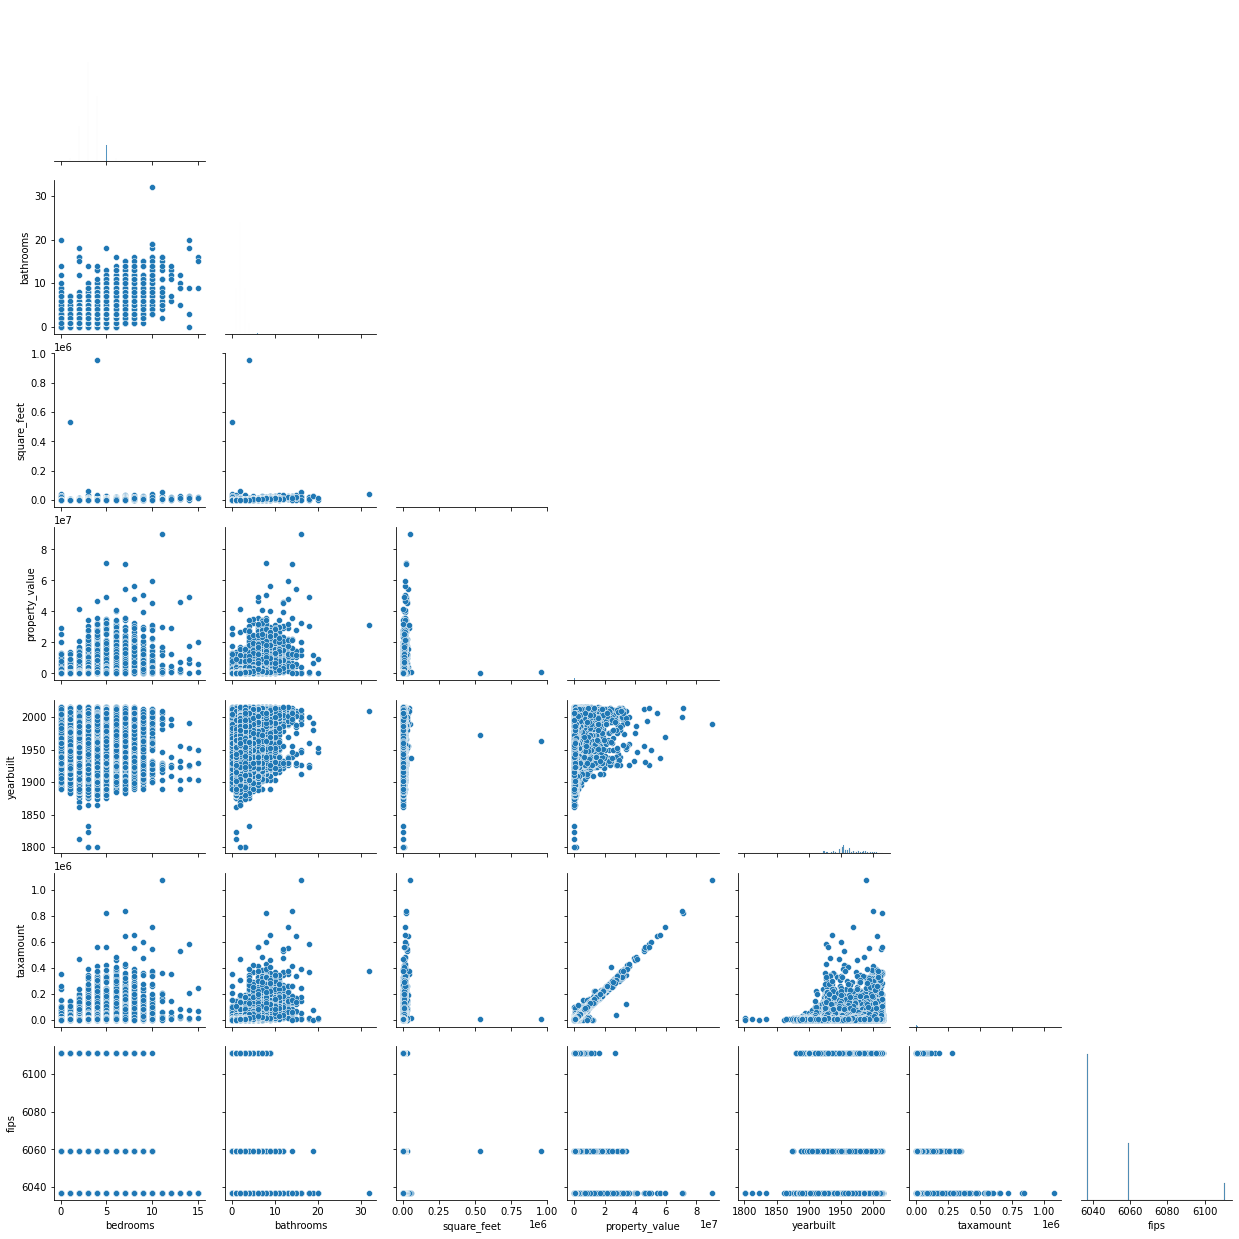

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips
1567873,3,1,1248,191578,1950,2712,6037
1218138,2,2,1326,1345206,1950,16539,6037
339661,2,1,1053,356648,1953,4575,6037
1017133,3,2,1256,175069,1946,2635,6037
40250,3,2,1640,543000,1957,6344,6059
...,...,...,...,...,...,...,...
941799,2,1,696,27699,1954,918,6037
631585,3,3,2081,619590,1987,7319,6037
883917,3,2,1742,196237,1957,2512,6037
1253096,4,3,2066,617344,1924,7650,6037


In [30]:
plot_variable_pairs(train)

In [ ]:
#4.
def plot_categorical_and_continous_vars():
    

In [12]:
#7.
#Hypotheses: The higher the bedroom count, bathroom count, square feet, and taxvalue, and tax amount
#the higher the value
# The lower the year built the lower the value

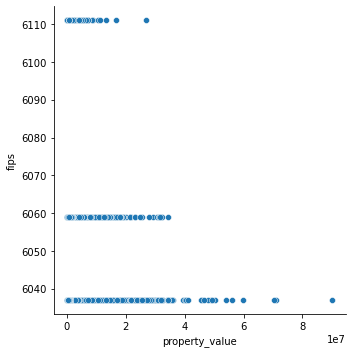

In [8]:
#8.
#only 3 fips
sns.relplot(x='property_value', y='fips', data=train)

<AxesSubplot:ylabel='bedrooms'>

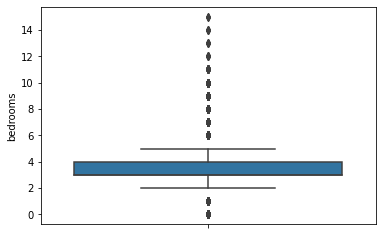

In [17]:
sns.boxplot(data=train, y='bedrooms')
#3 bedrooms is most comman number

<AxesSubplot:ylabel='bathrooms'>

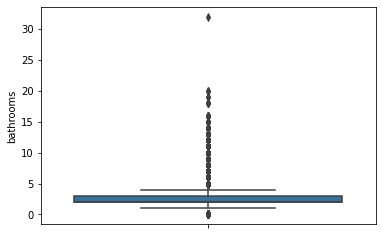

In [16]:
sns.boxplot(data=train, y='bathrooms')

In [18]:
train.head()

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips
1567873,3,1,1248,191578,1950,2712,6037
1218138,2,2,1326,1345206,1950,16539,6037
339661,2,1,1053,356648,1953,4575,6037
1017133,3,2,1256,175069,1946,2635,6037
40250,3,2,1640,543000,1957,6344,6059


<AxesSubplot:xlabel='bathrooms', ylabel='property_value'>

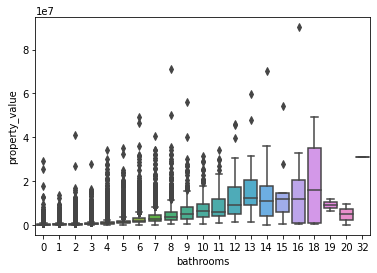

In [27]:
sns.boxplot(data=train, y='property_value', x='bathrooms')

<AxesSubplot:xlabel='bedrooms', ylabel='property_value'>

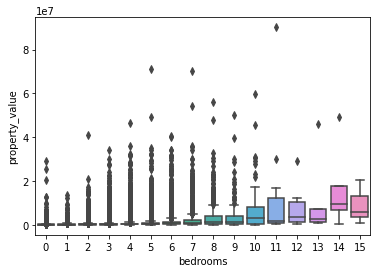

In [26]:
sns.boxplot(data=train, y='property_value', x='bedrooms')

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

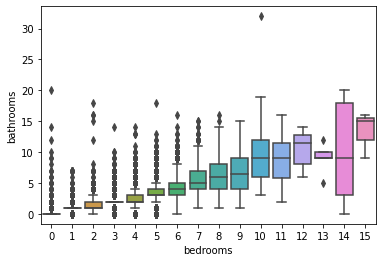

In [19]:
sns.boxplot(data=train, y='bathrooms', x='bedrooms')

In [ ]:
#10. taxamount is correlated with property value, bedrooms and bathrooms are related
# square feet, fips, and year built was not related

In [ ]:
#11. bedrooms and bathrooms are correlated

<AxesSubplot:xlabel='bedrooms', ylabel='yearbuilt'>

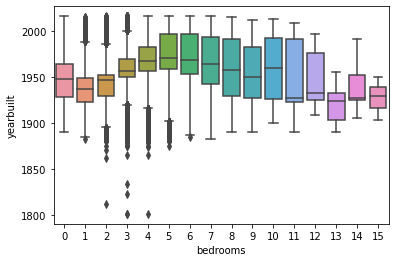

In [31]:
sns.boxplot(data=train, y='yearbuilt', x='bedrooms')

<AxesSubplot:xlabel='bathrooms', ylabel='yearbuilt'>

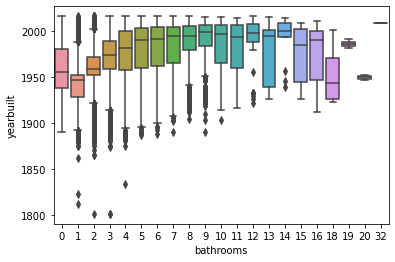

In [32]:
sns.boxplot(data=train, y='yearbuilt', x='bathrooms')

<AxesSubplot:xlabel='bedrooms', ylabel='taxamount'>

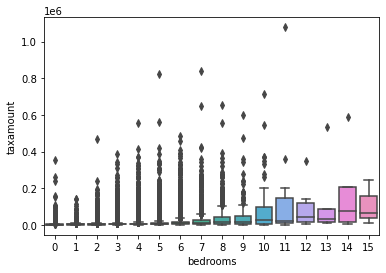

In [35]:
sns.boxplot(data=train, y='taxamount', x='bedrooms')

<AxesSubplot:xlabel='bathrooms', ylabel='taxamount'>

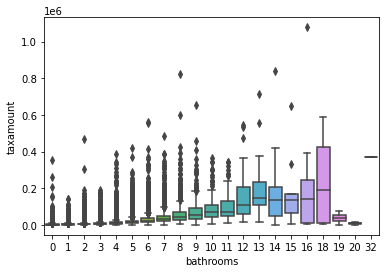

In [36]:
sns.boxplot(data=train, y='taxamount', x='bathrooms')

<AxesSubplot:xlabel='fips', ylabel='yearbuilt'>

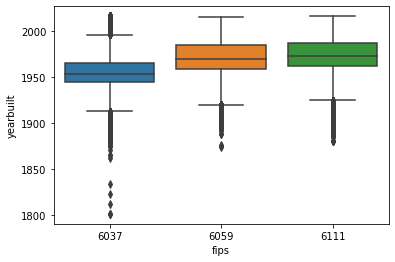

In [6]:
sns.boxplot(data=train, y='yearbuilt', x='fips')

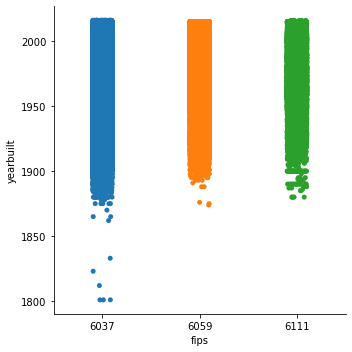

In [9]:
sns.catplot(data=train, y='yearbuilt', x='fips')

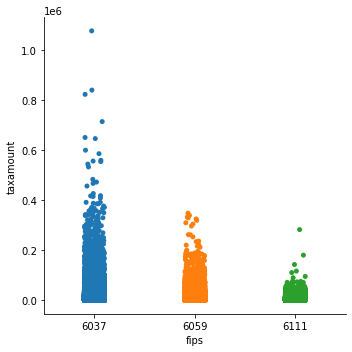

In [10]:
sns.catplot(data=train, y='taxamount', x='fips')

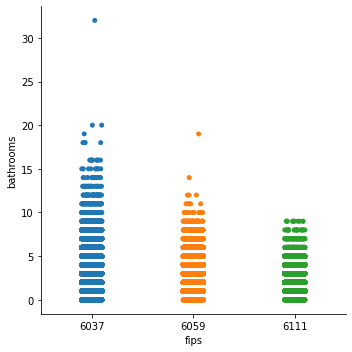

In [13]:
sns.catplot(data=train, y='bathrooms', x='fips')

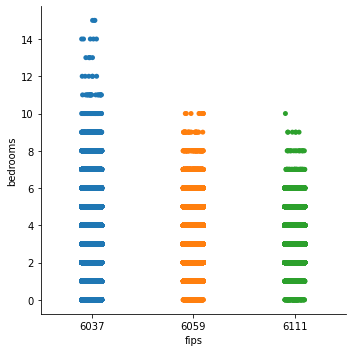

In [14]:
sns.catplot(data=train, y='bedrooms', x='fips')

<AxesSubplot:xlabel='fips', ylabel='count'>

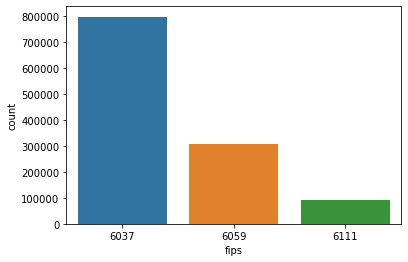

In [40]:
sns.countplot(data=train, x='fips')

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

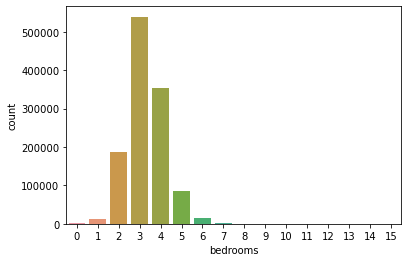

In [4]:
sns.countplot(data=train, x='bedrooms')

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

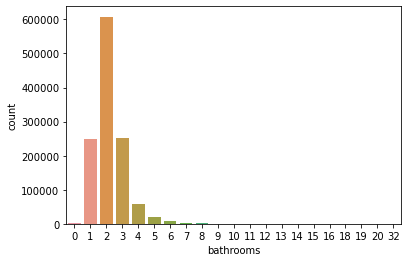

In [5]:
sns.countplot(data=train, x='bathrooms')